# Integration of D30 TSC and EXMC, naive and primed cells with monkey embryo datasets (Yang et al., Tan et al.)

## Correlation Coefficient

In [11]:
setwd("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed")

## Libraries

In [1]:
library(Seurat)
library(dplyr)
library(corrplot)

Warning message:
“package ‘Seurat’ was built under R version 4.1.2”
Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘corrplot’ was built under R version 4.1.1”
corrplot 0.92 loaded



In [2]:
library(tibble)

Warning message:
“package ‘tibble’ was built under R version 4.1.1”


In [3]:
library(patchwork)

In [4]:
library(viridis)

Loading required package: viridisLite



In [5]:
library(ggplot2)

In [6]:
library(RColorBrewer)

In [7]:
#library("xlsx")

In [8]:
library("corrplot")

In [9]:
suppressMessages(library(dplyr))
#suppressMessages(library(tidyverse))

In [12]:
so_VP_mk_LT.combined<-readRDS(file= "Monkey_Lanner_Tan_VPd30.rds")

In [31]:
so_VP_mk_LT.combined$finalClusters[which(so_VP_mk_LT.combined$finalClusters=="amnion 1_Lanner")]<- "amnion_Lanner"
so_VP_mk_LT.combined$finalClusters[which(so_VP_mk_LT.combined$finalClusters=="amnion 2_Lanner")]<- "amnion_Lanner"
so_VP_mk_LT.combined$finalClusters[which(so_VP_mk_LT.combined$finalClusters=="mesoderm 1_Lanner")]<- "mesoderm_Lanner"
so_VP_mk_LT.combined$finalClusters[which(so_VP_mk_LT.combined$finalClusters=="mesoderm 2_Lanner")]<- "mesoderm_Lanner"

In [21]:
so_VP_mk_LT.combined <- RenameIdents(object = so_VP_mk_LT.combined, "amnion 1_Lanner" = "amnion_Lanner", "amnion 2_Lanner" = "amnion_Lanner", "mesoderm 1_Lanner" = "mesoderm_Lanner","mesoderm 2_Lanner" = "mesoderm_Lanner")

In [32]:
Idents(so_VP_mk_LT.combined)<- so_VP_mk_LT.combined$finalClusters

In [23]:
### RNA

In [33]:
av.exp <- AverageExpression(so_VP_mk_LT.combined)$RNA

In [34]:
head(av.exp)
dim(av.exp)

,"Pham, Panda Primed","Pham, Panda TSC","Pham, Panda EXMC","Pham, Panda Naive",EPI_Tan_Hm,PE_Tan_Hm,TE_Tan_Hm,EXMC_Tan_Hm,EXMC_Tan_MK,EPI_Tan_MK,PE_Tan_MK,TE_Tan_MK,trophoblast_Lanner,epiblast_Lanner,endoderm_Lanner,extraembryonic mesoderm_Lanner,amnion_Lanner,transition_Lanner,extraembryonic mesenchyme_Lanner,mesoderm_Lanner
DDX11L1,0,0,0,0,3.178132e-05,0.00000000,0.000000000,0.0003557381,0,0,0,0,0,0,0,0,0,0,0,0
WASH7P,0,0,0,0,8.635347e-02,0.02970859,0.055221769,0.0464303318,0,0,0,0,0,0,0,0,0,0,0,0
MIR6859-1,0,0,0,0,4.588721e-03,0.00000000,0.002491887,0.0019027641,0,0,0,0,0,0,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0.000000e+00,0.00000000,0.000000000,0.0000000000,0,0,0,0,0,0,0,0,0,0,0,0
OR4G4P,0,0,0,0,0.000000e+00,0.00000000,0.000000000,0.0000000000,0,0,0,0,0,0,0,0,0,0,0,0
OR4G11P,0,0,0,0,0.000000e+00,0.00000000,0.000000000,0.0000000000,0,0,0,0,0,0,0,0,0,0,0,0


[1] 77133    20

In [35]:
av.exp_features<- av.exp[which(row.names(av.exp)%in% so_VP_mk_LT.combined@assays$integrated@var.features),]

In [36]:
head(av.exp_features)
dim(av.exp_features)

,"Pham, Panda Primed","Pham, Panda TSC","Pham, Panda EXMC","Pham, Panda Naive",EPI_Tan_Hm,PE_Tan_Hm,TE_Tan_Hm,EXMC_Tan_Hm,EXMC_Tan_MK,EPI_Tan_MK,PE_Tan_MK,TE_Tan_MK,trophoblast_Lanner,epiblast_Lanner,endoderm_Lanner,extraembryonic mesoderm_Lanner,amnion_Lanner,transition_Lanner,extraembryonic mesenchyme_Lanner,mesoderm_Lanner
ISG15,0.515111324,1.365596542,0.51456694,0.388481072,1.352214e-03,0.0000000000,1.170769e+00,0.0000000000,0.099080207,0.003490338,0.01678680,0.0081602826,0.02680143,0.233196837,0.446591158,0.14379220,0.13097921,0.212883121,0.054282703,0.162056585
ATAD3B,0.161870298,0.437947113,0.13114440,3.551162620,1.418539e-01,0.1477930558,1.360269e-01,0.2163957608,0.000000000,0.000000000,0.00000000,0.0000000000,0.00000000,0.000000000,0.000000000,0.00000000,0.00000000,0.000000000,0.000000000,0.000000000
MMP23B,0.043652665,0.004420003,0.06846338,0.005204994,1.251278e-03,0.0324286380,0.000000e+00,0.0098779164,0.695759296,0.022672038,0.00000000,0.0004423132,0.00379655,0.061758983,0.002054741,0.03897924,0.12668597,0.057821198,0.052032549,0.030206696
PRKCZ,0.199112650,0.302011278,0.20141730,0.153822901,5.716452e-04,0.0007502855,6.213512e-03,0.0002532418,0.047122347,0.047547760,0.06513863,0.8538250289,0.03145108,0.014760663,0.023790819,0.02117357,0.01336346,0.024181171,0.008209701,0.018224001
TNFRSF14,0.001004291,0.000000000,0.00000000,0.000000000,4.198685e-05,0.0000000000,1.976245e-05,0.0002147264,0.001192178,0.000000000,0.00000000,0.0809170406,0.17483894,0.001923842,0.004447343,0.00000000,0.01404207,0.005951061,0.008352184,0.004845484
SMIM1,0.041723668,0.124520562,0.10890100,0.008351922,1.242760e-03,0.0000000000,9.003553e-03,0.0060744891,0.085319662,0.093953482,0.12153198,0.4508472611,1.34779427,0.586469010,0.841033354,0.47309851,0.79225257,0.618967327,0.157885358,0.382177564


[1] 2000   20

In [37]:
colnames(av.exp_features)

[1] "Pham, Panda Primed"               "Pham, Panda TSC"                 
 [3] "Pham, Panda EXMC"                 "Pham, Panda Naive"               
 [5] "EPI_Tan_Hm"                       "PE_Tan_Hm"                       
 [7] "TE_Tan_Hm"                        "EXMC_Tan_Hm"                     
 [9] "EXMC_Tan_MK"                      "EPI_Tan_MK"                      
[11] "PE_Tan_MK"                        "TE_Tan_MK"                       
[13] "trophoblast_Lanner"               "epiblast_Lanner"                 
[15] "endoderm_Lanner"                  "extraembryonic mesoderm_Lanner"  
[17] "amnion_Lanner"                    "transition_Lanner"               
[19] "extraembryonic mesenchyme_Lanner" "mesoderm_Lanner"

In [38]:
av.exp_RNA_features_reordered <- av.exp_features[, c("Pham, Panda Naive", "EPI_Tan_MK","EPI_Tan_Hm", "epiblast_Lanner","amnion_Lanner","transition_Lanner","PE_Tan_MK","PE_Tan_Hm", "Pham, Panda Primed", "trophoblast_Lanner","TE_Tan_MK","TE_Tan_Hm", "Pham, Panda TSC", "EXMC_Tan_MK","EXMC_Tan_Hm",  "extraembryonic mesoderm_Lanner",  "extraembryonic mesenchyme_Lanner","Pham, Panda EXMC", "mesoderm_Lanner",  "endoderm_Lanner")]


In [39]:
colnames(av.exp_features)

[1] "Pham, Panda Primed"               "Pham, Panda TSC"                 
 [3] "Pham, Panda EXMC"                 "Pham, Panda Naive"               
 [5] "EPI_Tan_Hm"                       "PE_Tan_Hm"                       
 [7] "TE_Tan_Hm"                        "EXMC_Tan_Hm"                     
 [9] "EXMC_Tan_MK"                      "EPI_Tan_MK"                      
[11] "PE_Tan_MK"                        "TE_Tan_MK"                       
[13] "trophoblast_Lanner"               "epiblast_Lanner"                 
[15] "endoderm_Lanner"                  "extraembryonic mesoderm_Lanner"  
[17] "amnion_Lanner"                    "transition_Lanner"               
[19] "extraembryonic mesenchyme_Lanner" "mesoderm_Lanner"

In [40]:
cor_expression_matrix <- cor(av.exp_RNA_features_reordered, method = "spearman")

In [41]:
head(cor_expression_matrix)

,"Pham, Panda Naive",EPI_Tan_MK,EPI_Tan_Hm,epiblast_Lanner,amnion_Lanner,transition_Lanner,PE_Tan_MK,PE_Tan_Hm,"Pham, Panda Primed",trophoblast_Lanner,TE_Tan_MK,TE_Tan_Hm,"Pham, Panda TSC",EXMC_Tan_MK,EXMC_Tan_Hm,extraembryonic mesoderm_Lanner,extraembryonic mesenchyme_Lanner,"Pham, Panda EXMC",mesoderm_Lanner,endoderm_Lanner
"Pham, Panda Naive",1.0000000,0.4849248,0.3278248,0.5654629,0.4905730,0.5414509,0.3944397,0.3690792,0.7270632,0.4211175,0.3945718,0.3682304,0.6085302,0.3830471,0.3129570,0.5203824,0.4229617,0.5549853,0.4913329,0.4229782
EPI_Tan_MK,0.4849248,1.0000000,0.2889975,0.7810870,0.7686632,0.7886133,0.7413869,0.3986119,0.6083602,0.6011928,0.6173286,0.3267928,0.4695355,0.7897260,0.3324845,0.7993398,0.7707863,0.5236925,0.7975601,0.6956716
EPI_Tan_Hm,0.3278248,0.2889975,1.0000000,0.2851786,0.2579015,0.2754957,0.2261593,0.7673364,0.4401870,0.1720304,0.1848813,0.8886325,0.3090764,0.3010222,0.9174071,0.2645573,0.2773248,0.3680830,0.2666006,0.1647579
epiblast_Lanner,0.5654629,0.7810870,0.2851786,1.0000000,0.8902616,0.9668146,0.6118232,0.3455864,0.6573470,0.7595455,0.6478409,0.3405111,0.5039741,0.6397666,0.2890989,0.8886337,0.7558656,0.4525894,0.9002859,0.7463586
amnion_Lanner,0.4905730,0.7686632,0.2579015,0.8902616,1.0000000,0.9227904,0.5957060,0.3411542,0.6032794,0.7731851,0.6399996,0.3146540,0.5561603,0.6520012,0.2781137,0.9175099,0.7944345,0.4756387,0.9174036,0.7545773
transition_Lanner,0.5414509,0.7886133,0.2754957,0.9668146,0.9227904,1.0000000,0.6139375,0.3466156,0.6347917,0.7522801,0.6318900,0.3326665,0.5029963,0.6286949,0.2810259,0.9290901,0.7584305,0.4473370,0.9398599,0.7619452


In [42]:
write.csv(cor_expression_matrix, "cor_av.exp_RNA_2000features_MKEmbryo_D30EXMC.csv")

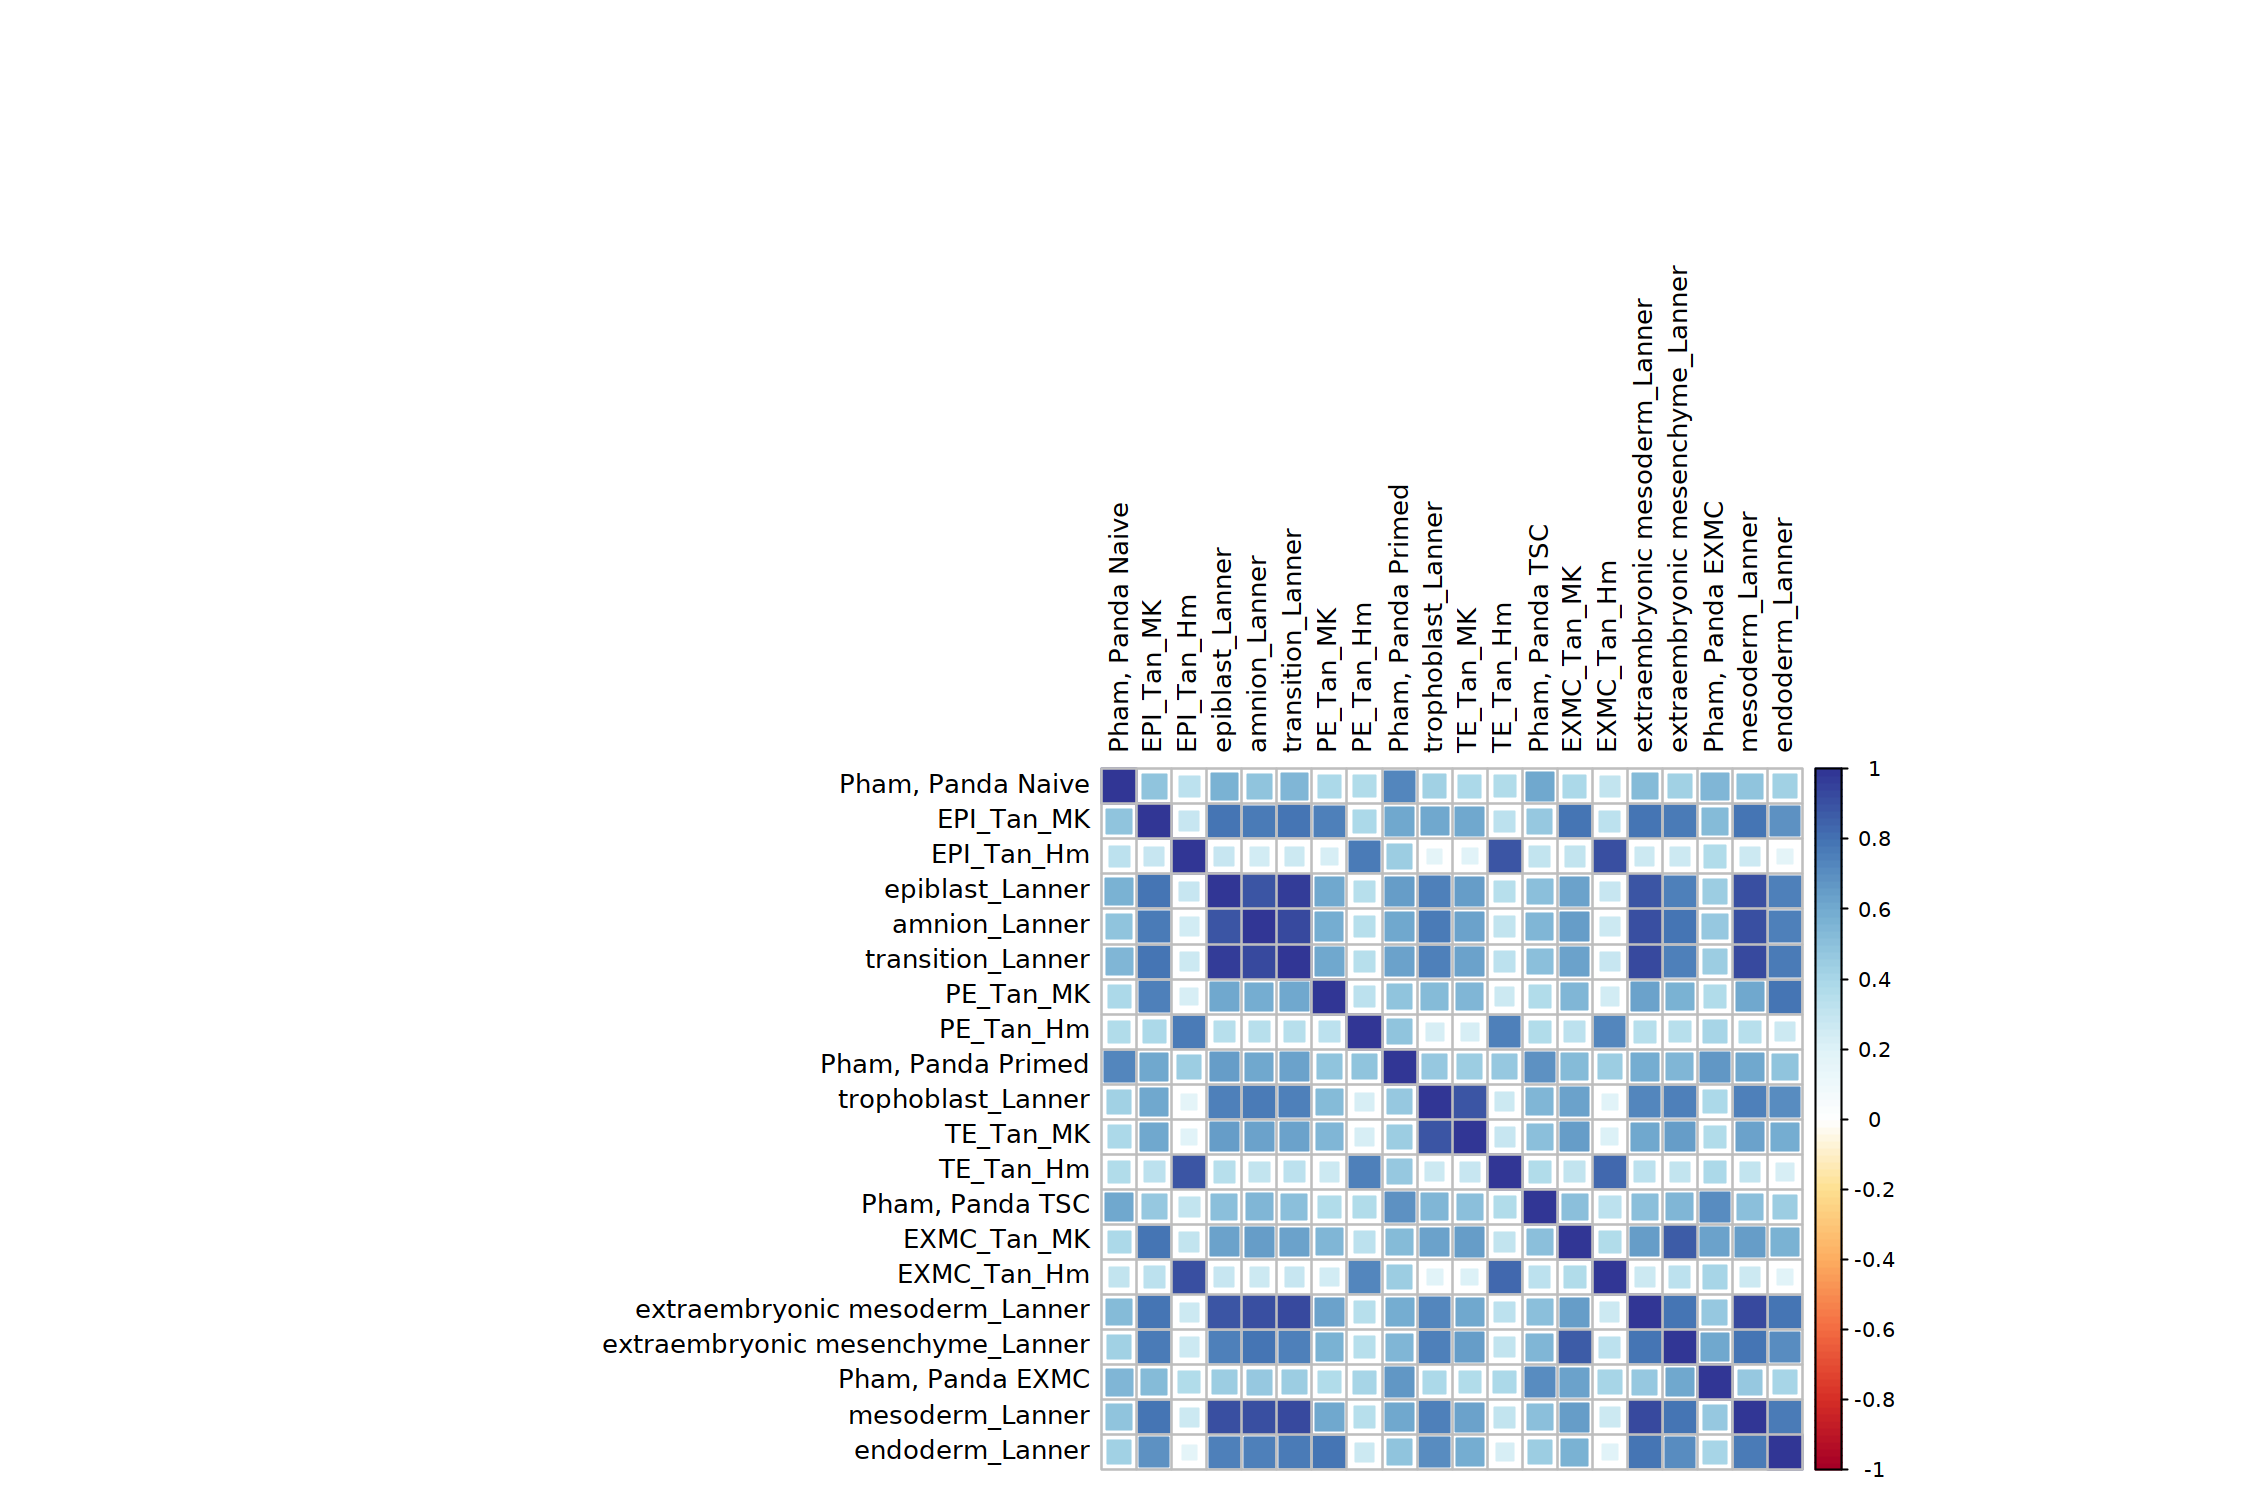

In [43]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)
corrplot(cor_expression_matrix , method = "square", col = COL2('RdYlBu', 100), tl.col="black")

In [44]:
pdf("Figures/Correlation_coeffient_VPD30_monkey_square.pdf", width = 25, height = 25)
corrplot(cor_expression_matrix , method = "square", col = COL2('RdYlBu', 100), tl.col="black")
dev.off()

png 
  2

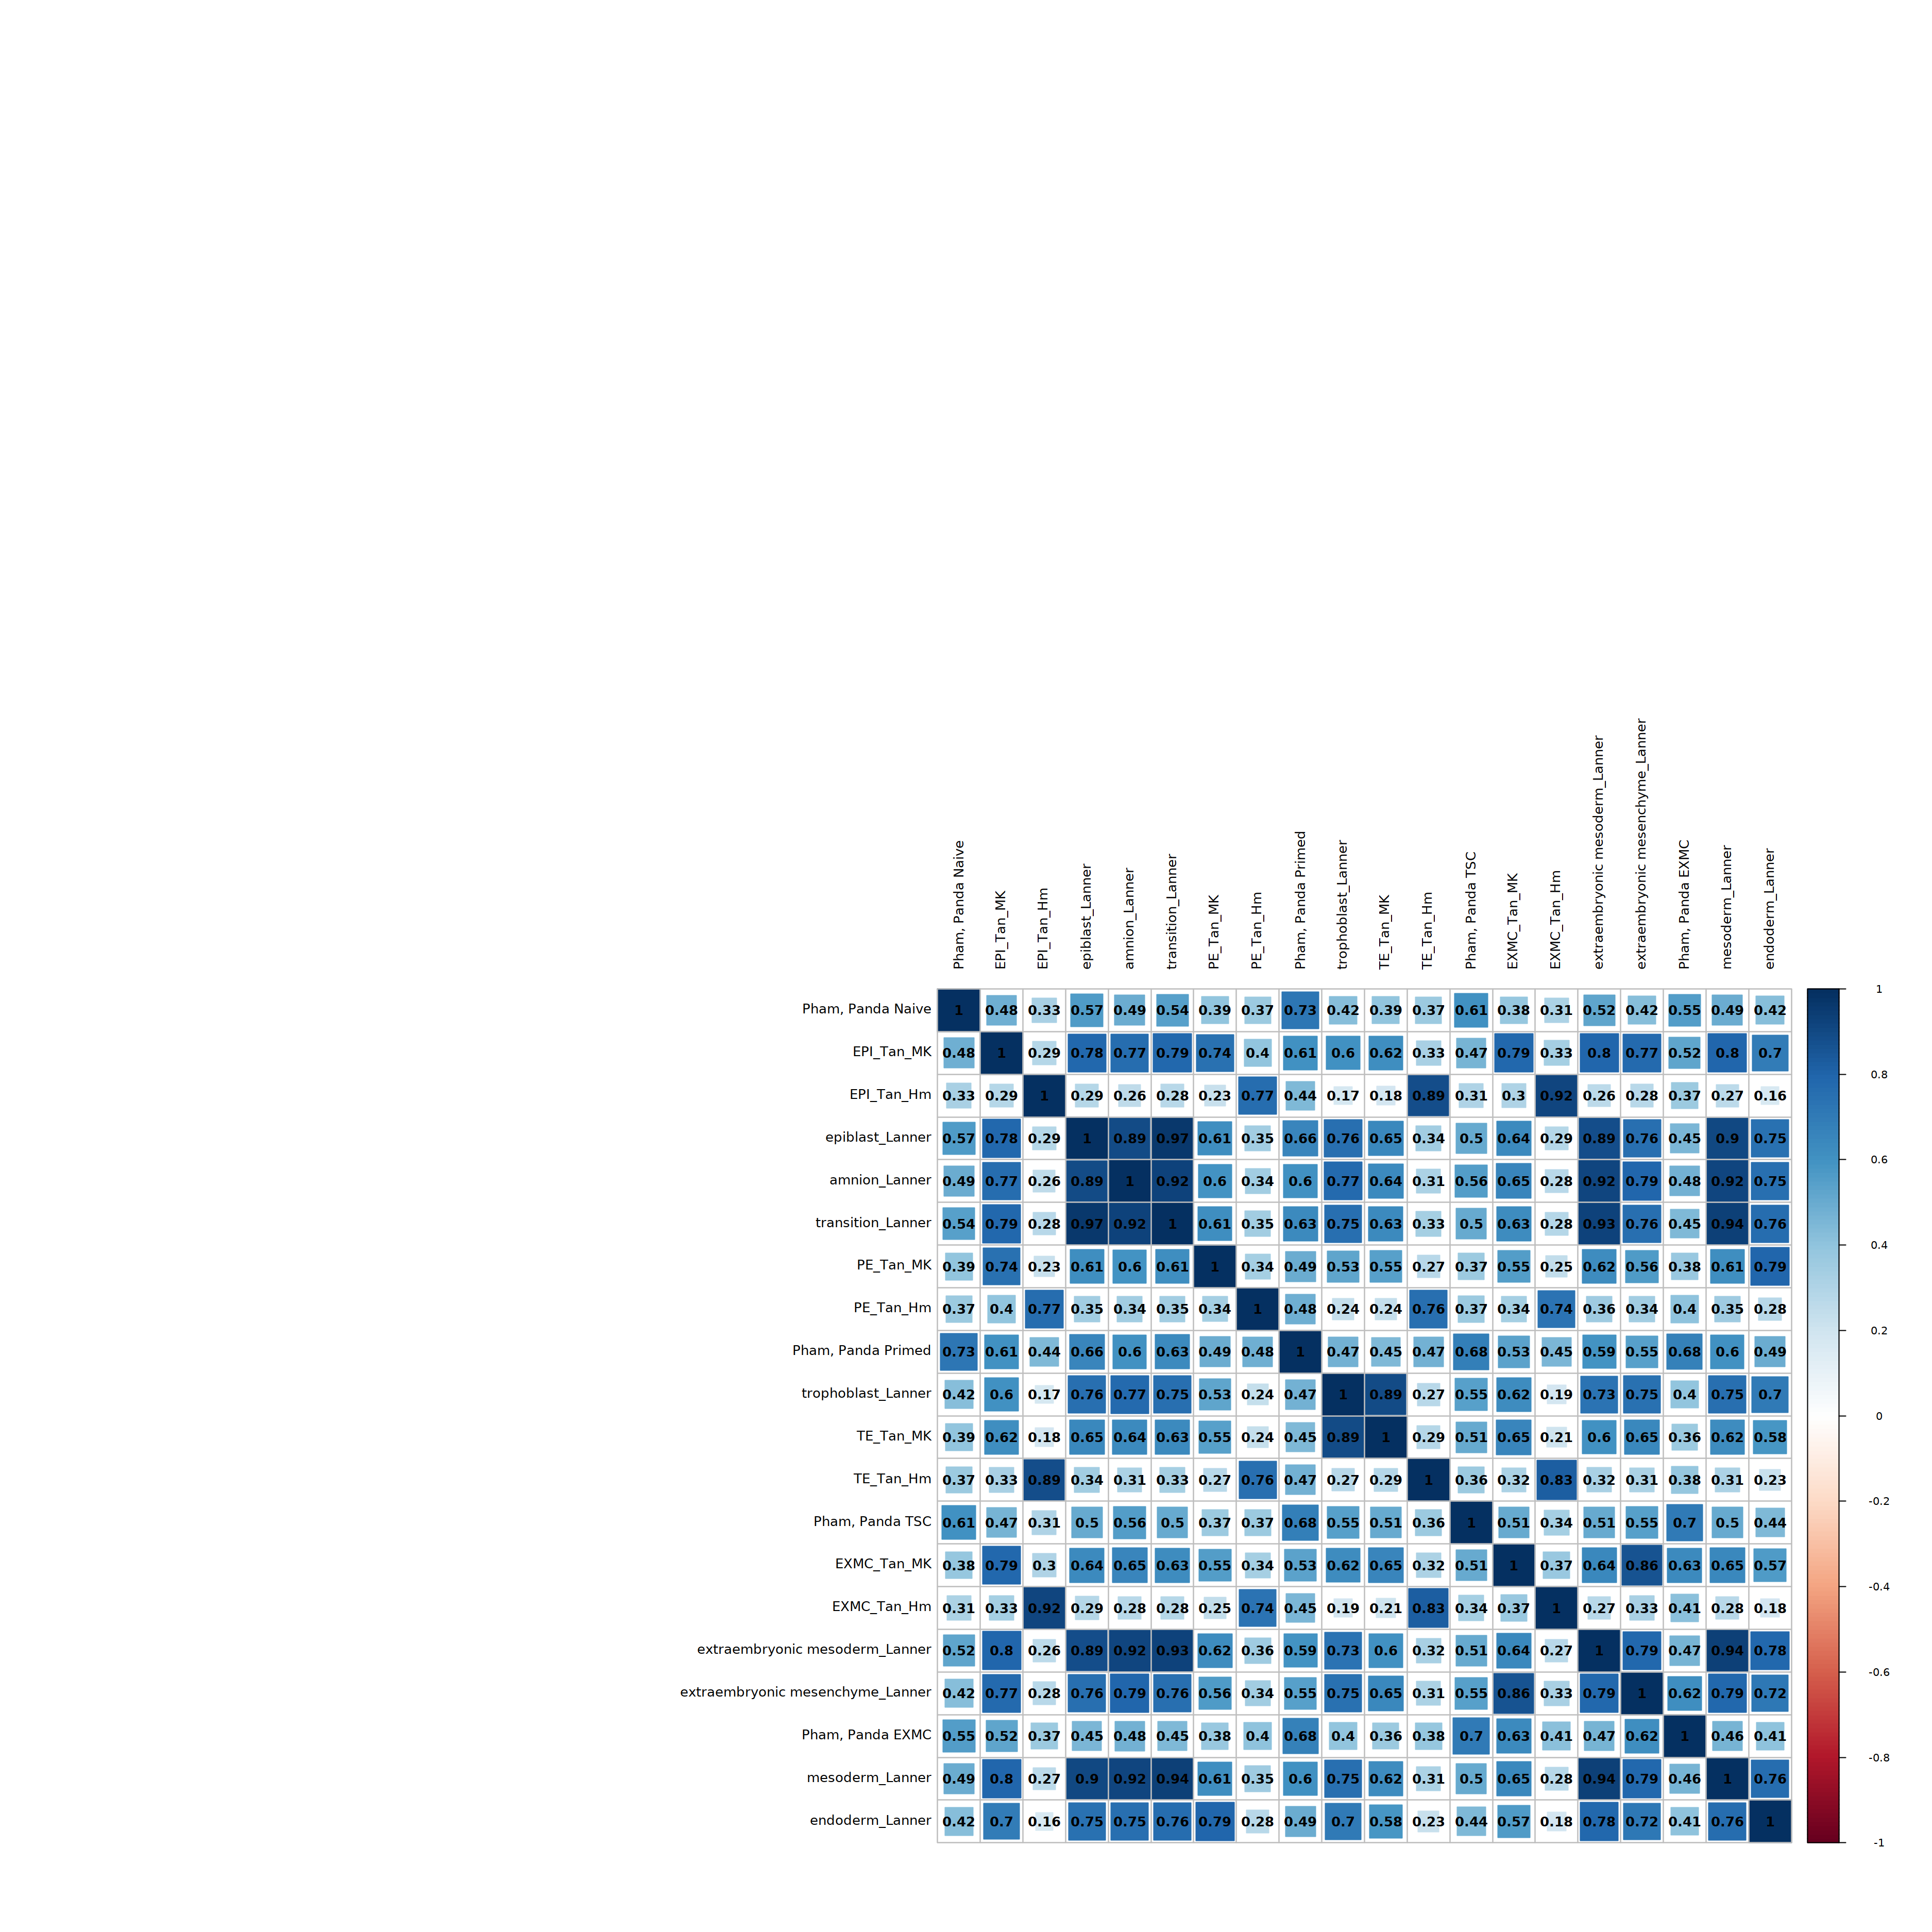

In [46]:
options(repr.plot.width = 25, repr.plot.height = 25, repr.plot.res = 150)
corrplot(cor_expression_matrix, method="square",  
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black"
         )

In [47]:
pdf("Figures/FigS1E_Correlation_coeffient_VPD30_monkey_square_number.pdf", width = 15, height = 15)
corrplot(cor_expression_matrix, method="square",  
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black"
         )
dev.off()

png 
  2

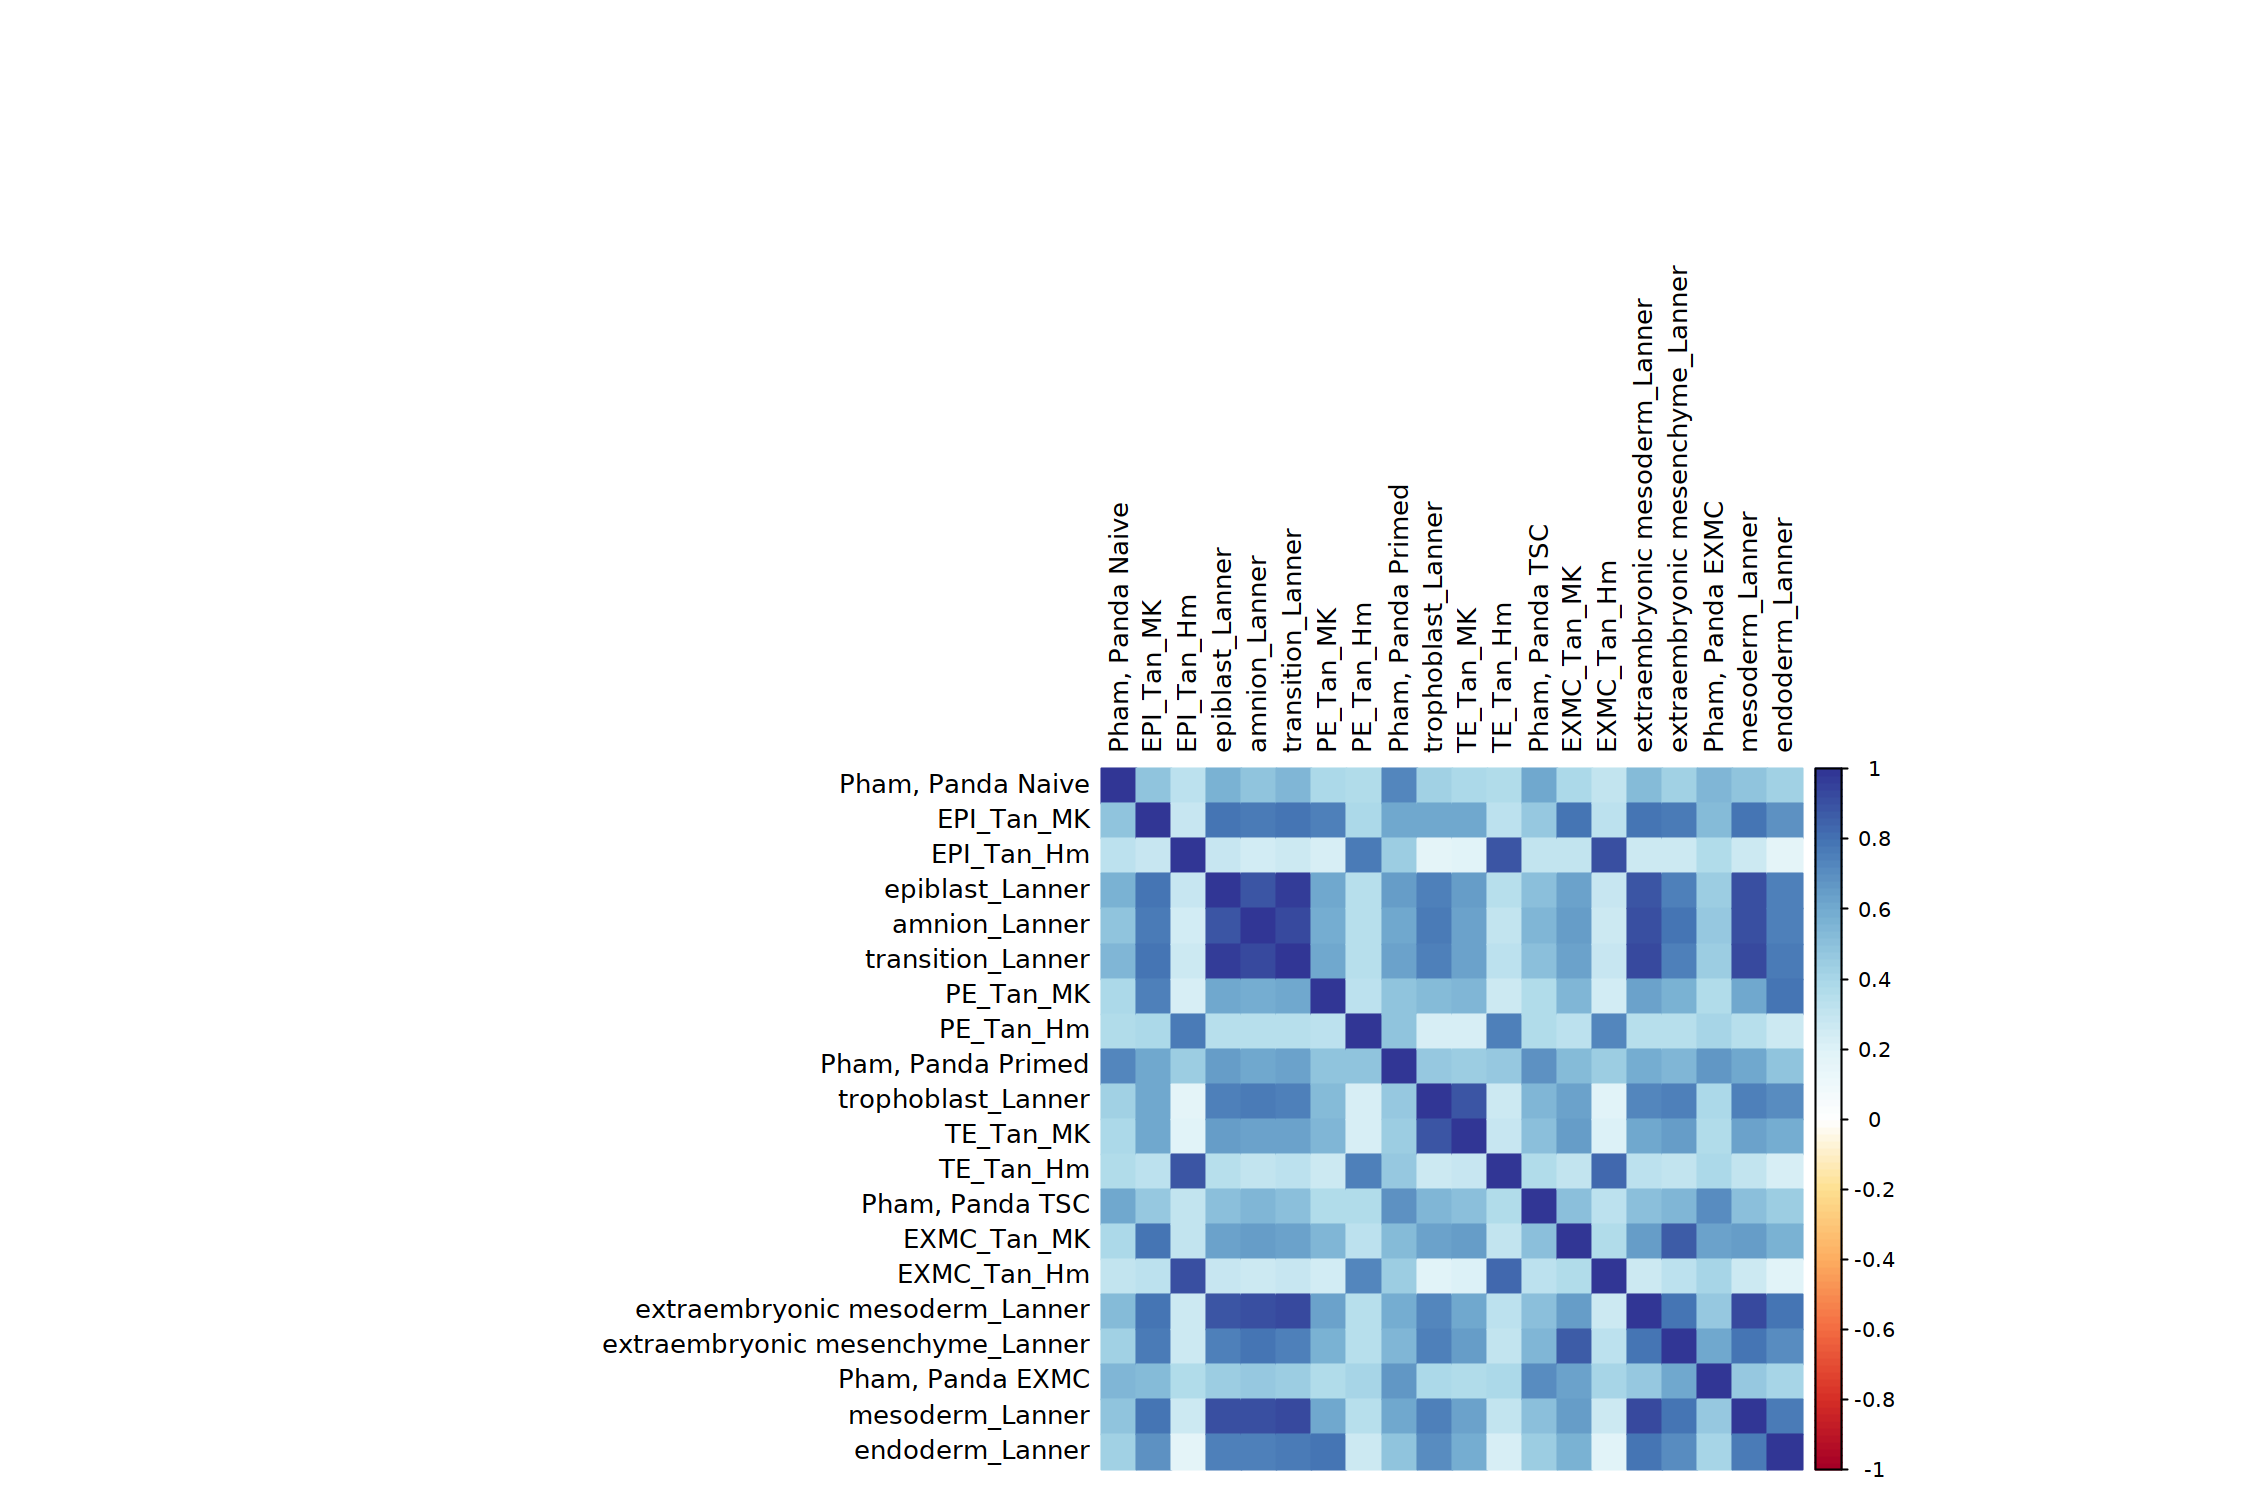

In [48]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)
corrplot(cor_expression_matrix , method = "color", col = COL2('RdYlBu', 100), tl.col="black")

In [49]:
pdf("Figures/Correlation_coeffient_VP_monkey_color.pdf", width = 25, height = 25)
corrplot(cor_expression_matrix , method = "color", col = COL2('RdYlBu', 100), tl.col="black")
dev.off()

png 
  2